          Country Name  \
0          Afghanistan   
1              Albania   
2              Algeria   
3               Angola   
4  Antigua and Barbuda   

   Agriculture, forestry, and fishing, value added (% of GDP)  \
0                                          24.892270            
1                                          16.837054            
2                                           6.586676            
3                                           4.805339            
4                                           1.547636            

   Annual freshwater withdrawals, total (% of internal resources)  \
0                                          43.015907                
1                                           4.546691                
2                                          63.158553                
3                                           0.476824                
4                                           9.230769                

   Current health expenditure (% of G

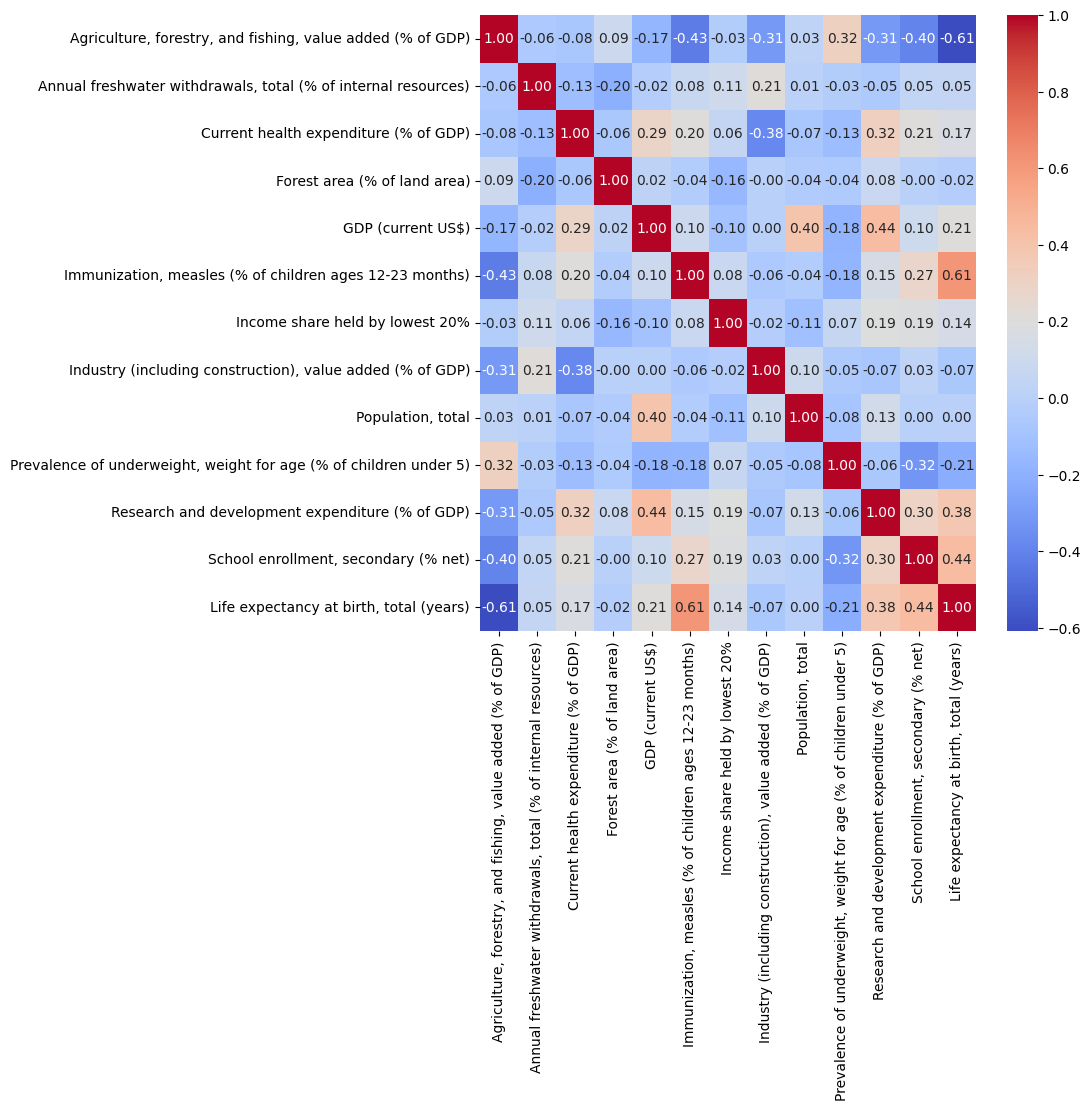

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read data from excel file
file_path = './life_indicator_2008-2018.xlsx'
data_2008 = pd.read_excel(file_path, sheet_name='2008')
print(data_2008.head())

# calculate the missing values
missing_values = data_2008.isnull().sum()
print("\n[+] Missing values:\n", missing_values)

# calculate the statistics
statistics = data_2008.describe()
print("\n[+] Statistics:\n", statistics)

# remove columns with more than half missing values
# columns_to_drop = missing_values[missing_values > (data_2008.shape[0] / 2)].index
# data_2008 = data_2008.drop(columns=columns_to_drop)

# fill missing values with median
for column in data_2008.select_dtypes(include='number').columns:
    median_value = data_2008[column].median()
    data_2008[column].fillna(median_value, inplace=True)

# fill missing values with mean
# for column in data_2008.select_dtypes(include='number').columns:
    # mean_value = data_2008[column].mean()
    # data_2008[column].fillna(mean_value, inplace=True)

# calculate the remaining missing values
remaining_missing_values = data_2008.isnull().sum()
print("\n[+] Remaining missing values:\n", remaining_missing_values)

# calculate the correlation matrix
correlation_matrix = data_2008.corr(numeric_only = True)
print("\n[+] Correlation matrix:\n", correlation_matrix)

# plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()



[+] Life expectancy statistics:
 count    210.000000
mean      69.885981
std        9.023219
min       43.566000
25%       63.970000
50%       72.405500
75%       76.941207
max       82.893000
Name: Life expectancy at birth, total (years), dtype: float64

[+] Skewness:
 -0.7600012501902191

[+] Kurtosis:
 -0.23537694923288077


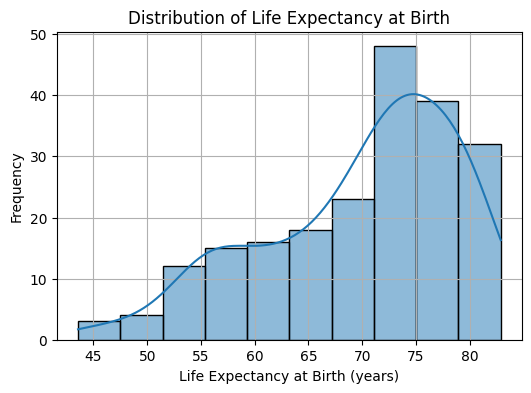

In [124]:
# get the statistics of life expectancy
life_expectancy_stats = data_2008['Life expectancy at birth, total (years)'].describe()

# calculate the skewness and kurtosis
skewness = data_2008['Life expectancy at birth, total (years)'].skew()
kurtosis = data_2008['Life expectancy at birth, total (years)'].kurt()

print("\n[+] Life expectancy statistics:\n", life_expectancy_stats)
print("\n[+] Skewness:\n", skewness)
print("\n[+] Kurtosis:\n", kurtosis)

# plot the distribution of life expectancy
plt.figure(figsize=(6, 4))
sns.histplot(data_2008['Life expectancy at birth, total (years)'], kde=True)
plt.title('Distribution of Life Expectancy at Birth')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [125]:
# Use linear regression as the baseline model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# drop the target column and the country name
X = data_2008.drop(columns=['Life expectancy at birth, total (years)', 'Country Name'])
y = data_2008['Life expectancy at birth, total (years)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# make predictions
y_pred = linear_model.predict(X_test)

# calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# get the coefficients and intercept of the model
linear_model_coefficients = linear_model.coef_
model_intercept = linear_model.intercept_

# generated the correspondence between regression coefficients and feature names
feature_importance = pd.Series(linear_model.coef_, index=X_train.columns).sort_values(ascending=False)

print("\n[+] Mean Squared Error:\n", mse)
print("\n[+] R2 Score:\n", r2)
print("\n[+] Coefficients:\n", linear_model_coefficients)
print("\n[+] Intercept:\n", model_intercept)
print("\n[+] Feature Importance:\n", feature_importance)



[+] Mean Squared Error:
 39.029289285593066

[+] R2 Score:
 0.43515037143739355

[+] Coefficients:
 [-3.52977941e-01  2.66977103e-03 -3.25689153e-01  2.80712371e-02
  1.52147999e-12  2.45576723e-01  5.14204313e-01 -1.53111264e-01
 -4.43304898e-10  1.80588939e-01  9.24083830e-01  9.10663004e-02]

[+] Intercept:
 44.17088818729287

[+] Feature Importance:
 Research and development expenditure (% of GDP)                      9.240838e-01
Income share held by lowest 20%                                      5.142043e-01
Immunization, measles (% of children ages 12-23 months)              2.455767e-01
Prevalence of underweight, weight for age (% of children under 5)    1.805889e-01
School enrollment, secondary (% net)                                 9.106630e-02
Forest area (% of land area)                                         2.807124e-02
Annual freshwater withdrawals, total (% of internal resources)       2.669771e-03
GDP (current US$)                                                   

In [126]:
# Test the performance of Linear Regression with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pca_mse = []
pca_r2 = []

def pca_test(n):
    # print(f"\n[+] PCA with {n} components")
    # create a PCA model
    pca = PCA(n_components=n)
    data_2008_pca = pca.fit_transform(X_train_scaled)

    # transform the test data
    X_test_pca = pca.transform(X_test_scaled)

    # create a DataFrame for the PCA results
    pca_columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]
    X_train_pca_df = pd.DataFrame(data_2008_pca, columns=pca_columns)
    X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

    # plot the explained variance ratio
    # plt.figure(figsize=(4, 2))
    # plt.bar(pca_columns, pca.explained_variance_ratio_)
    # plt.xlabel('Principal Components')
    # plt.ylabel('Explained Variance Ratio')
    # plt.title('Explained Variance Ratio of Principal Components')
    # plt.grid(True)
    # plt.show()

    # create a linear regression model
    linear_model_pca = LinearRegression()
    linear_model_pca.fit(X_train_pca_df, y_train)

    # make predictions
    y_pred_pca = linear_model_pca.predict(X_test_pca_df)

    # calculate the mean squared error and R2 score
    mse_pca = mean_squared_error(y_test, y_pred_pca)
    r2_pca = r2_score(y_test, y_pred_pca)

    # print("\n[+] Mean Squared Error (PCA+LinearReg):\n", mse_pca)
    # print("\n[+] R2 Score (PCA+LinearReg):\n", r2_pca)

    pca_mse.append(mse_pca)
    pca_r2.append(r2_pca)

for n in range(1, X_train.shape[1] + 1):
    pca_test(n)

# find the best number of components
best_index = pca_r2.index(max(pca_r2))
best_mse = pca_mse[best_index]
best_r2 = pca_r2[best_index]

print("\n[+] Best Number of Components:\n", best_index + 1)
print("\n[+] Best Mean Squared Error:\n", best_mse)
print("\n[+] Best R2 Score:\n", best_r2)



[+] Best Number of Components:
 11

[+] Best Mean Squared Error:
 28.811167775959586

[+] Best R2 Score:
 0.5830316740429874


In [127]:
# Test the performance of the decision tree model
from sklearn.tree import DecisionTreeRegressor

# create a decision tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# calculate the mean squared error and R2 score
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\n[+] Mean Squared Error (Decision Tree):\n", mse_tree)
print("\n[+] R2 Score (Decision Tree):\n", r2_tree)



[+] Mean Squared Error (Decision Tree):
 36.7022398999887

[+] R2 Score (Decision Tree):
 0.4688284886966455


In [128]:
# Test the performance of the random forest model
from sklearn.ensemble import RandomForestRegressor

# create a random forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# make predictions
y_pred_forest = random_forest_model.predict(X_test)

# calculate the mean squared error and R2 score
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\n[+] Mean Squared Error (Random Forest):\n", mse_forest)
print("\n[+] R2 Score (Random Forest):\n", r2_forest)



[+] Mean Squared Error (Random Forest):
 14.744774383664074

[+] R2 Score (Random Forest):
 0.7866069178736896


In [129]:
# Test the performance of the gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor

# create a gradient boosting model
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# make predictions
y_pred_gb = gradient_boosting_model.predict(X_test)

# calculate the mean squared error and R2 score
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n[+] Mean Squared Error (Gradient Boosting):\n", mse_gb)
print("\n[+] R2 Score (Gradient Boosting):\n", r2_gb)



[+] Mean Squared Error (Gradient Boosting):
 16.030810215332604

[+] R2 Score (Gradient Boosting):
 0.7679948223133353


In [130]:
# Test the performance of the k-nearest neighbors model
from sklearn.neighbors import KNeighborsRegressor

# create a k-nearest neighbors model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# make predictions
y_pred_knn = knn_model.predict(X_test)

# calculate the mean squared error and R2 score
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\n[+] Mean Squared Error (K-Nearest Neighbors):\n", mse_knn)
print("\n[+] R2 Score (K-Nearest Neighbors):\n", r2_knn)



[+] Mean Squared Error (K-Nearest Neighbors):
 74.55373303125127

[+] R2 Score (K-Nearest Neighbors):
 -0.0789755381531565


In [131]:
# Test the performance of the support vector machine model
from sklearn.svm import SVR

# create a support vector machine model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# make predictions
y_pred_svm = svm_model.predict(X_test)

# calculate the mean squared error and R2 score
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("\n[+] Mean Squared Error (Support Vector Machine):\n", mse_svm)
print("\n[+] R2 Score (Support Vector Machine):\n", r2_svm)



[+] Mean Squared Error (Support Vector Machine):
 62.00008157750475

[+] R2 Score (Support Vector Machine):
 0.1027066162121455


In [132]:
# Compare the performance of different models

# create a DataFrame for the results
models = ['Linear Regression', 'LinearReg with PCA', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors', 'Support Vector Machine']
mse_values = [mse, best_mse, mse_tree, mse_forest, mse_gb, mse_knn, mse_svm]
r2_values = [r2, best_r2, r2_tree, r2_forest, r2_gb, r2_knn, r2_svm]

results = pd.DataFrame({'Model': models, 'Mean Squared Error': mse_values, 'R2 Score': r2_values})
results = results.sort_values(by='R2 Score', ascending=False)
print("\n[+] Model Comparison:\n", results)



[+] Model Comparison:
                     Model  Mean Squared Error  R2 Score
3           Random Forest           14.744774  0.786607
4       Gradient Boosting           16.030810  0.767995
1      LinearReg with PCA           28.811168  0.583032
2           Decision Tree           36.702240  0.468828
0       Linear Regression           39.029289  0.435150
6  Support Vector Machine           62.000082  0.102707
5     K-Nearest Neighbors           74.553733 -0.078976
